In [477]:
from matplotlib import image
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import openpyxl
import xlsxwriter
import statsmodels.api as sm
import cv2
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from PIL import Image, ImageFilter
import csv
import pandas as pd
import glob
import math
import plotly.express as px
from matplotlib.ticker import FuncFormatter

current_path = os.getcwd()
print(current_path)

C:\Users\lbv06


In [459]:
# loading one of the data
df = pd.read_csv(r'd:\usuarios\lbv06\Downloads\Abasalt_Microscope_68hr\B_1.csv')
print(df.head())

       Area   StdDev  Min  Max      XM     YM      BX     BY  Width  Height  \
0  1  1.008   72.975    0  255  16.819  1.941  15.873  1.376  1.799   1.058   
1  2  1.321   80.181    0  255  29.271  3.584  28.254  2.328  1.905   2.434   
2  3  4.692  108.071    0  255  22.230  4.278  20.000  2.540  3.915   3.175   
3  4  1.445   92.655    0  255  33.223  4.005  32.381  2.857  1.587   2.328   
4  5  2.128   71.001    0  255  31.693  6.403  30.688  4.762  2.011   3.386   

   Circ.   IntDen   Skew  RawIntDen     AR  Round  Solidity  
0  0.222  234.148 -2.889    20910.0  1.888  0.530     0.664  
1  0.145  299.824 -2.490    26775.0  2.649  0.377     0.491  
2  0.100  916.604 -1.257    81855.0  1.889  0.529     0.582  
3  0.139  311.245 -1.906    27795.0  2.130  0.469     0.585  
4  0.048  496.851 -2.994    44370.0  2.481  0.403     0.439  


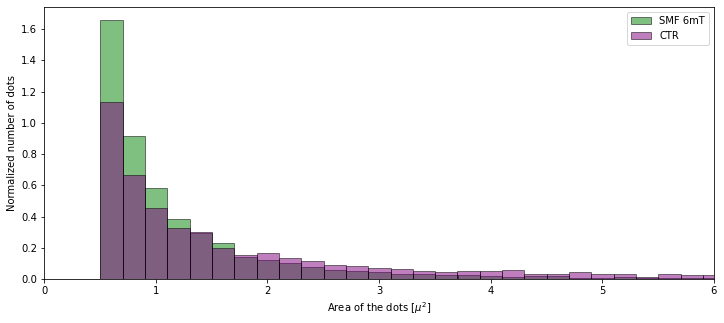

In [768]:
# in ImageJ I used the following setting
# spot size = 0.50-10000.00
# Process > unshaped mask > radium = 10 px, mask weight = 0.5
# Process > binary


c68h = os.path.join(r"d:\usuarios\lbv06\Downloads\Abasalt_Microscope_68hr", "C_*.csv")
c68h = glob.glob(c68h)
dfc = pd.concat(map(pd.read_csv, c68h), ignore_index=True)

b68h = os.path.join(r"d:\usuarios\lbv06\Downloads\Abasalt_Microscope_68hr", "B_*.csv")
b68h = glob.glob(b68h)
dfb = pd.concat(map(pd.read_csv, b68h), ignore_index=True)

w = 0.2
nb = math.ceil((dfb['Area'].max() - dfb['Area'].min())/w)
nc = math.ceil((dfc['Area'].max() - dfc['Area'].min())/w)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))

plt.hist(dfb['Area'], bins = nb, color='Green', edgecolor='black', alpha=0.5, label='SMF 6mT', density=True)
plt.hist(dfc['Area'], bins = nc, color='Purple', edgecolor='black', alpha=0.5, label='CTR', density=True)

plt.xlim(xmin=0, xmax = 6)
plt.xlabel('Area of the dots [$\mu^{2}$]')
plt.ylabel('Normalized number of dots')
plt.legend(loc='upper right')
plt.savefig('Tubulin_dot_size_histogram.png', bbox_inches='tight')
plt.show()

In [763]:
# Manually calculating the percentage of the dot area in the desired region

data = dfb['Area']
count = 0
i = 0.5
list1 = []

while i < imax:
    for Area in data:
        if i < Area < i + 0.1:
            count = count + 1
    percen = round(count/len(data)*100, 2)
    list1.append(percen)
    count = 0
    i = i + 0.1 


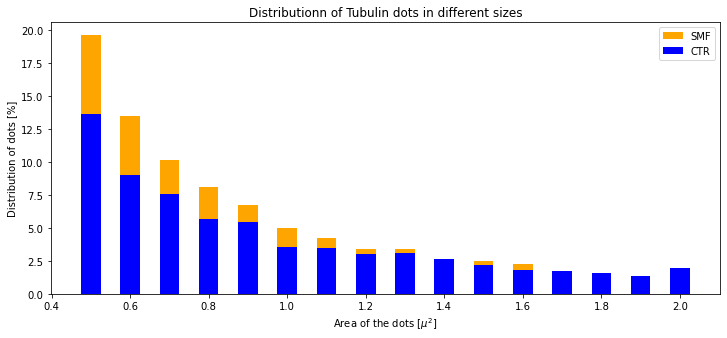

In [767]:
# Manually calculating the percentage of the dot area in the desired region

data = dfc['Area']
count = 0
i = 0.5
imax = 2.1
list2 = []


x_range = np.arange(i, imax, 0.1)


while i < imax:
    for Area in data:
        if i < Area < i + 0.1:
            count = count + 1
    percen = round(count/len(data)*100, 2)
    list2.append(percen)
    count = 0
    i = i + 0.1 
    
    
fig, axe = plt.subplots(nrows=1, ncols=1, figsize=(12,5))

plt.bar(x_range, list1, capsize=0, color='Orange', width=0.05, label='SMF')
plt.bar(x_range, list2, capsize=0, color='Blue', width=0.05, label='CTR')

plt.xlabel('Area of the dots [$\mu^{2}$]')
plt.legend()
plt.ylabel('Distribution of dots [%]') 
plt.title('Distributionn of Tubulin dots in different sizes')
plt.savefig('Histogram_dot_size.png', bbox_inches='tight')
plt.show()

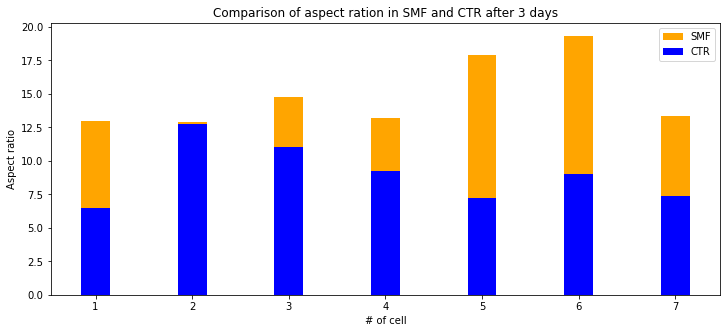

In [783]:
# aspect ratio data

SMF = [441/34, 345/26.8, 296/20, 267/20.25, 292/16.28, 361/18.68, 268/20.12]
CTR = [168/26, 230/18, 154/14, 176/19, 202/28, 207/23, 221/30]
x_range = [1, 2, 3, 4, 5, 6, 7]

fig, axe = plt.subplots(nrows=1, ncols=1, figsize=(12,5))

plt.bar(x_range, SMF, capsize=0, color='Orange', width=0.3, label='SMF')
plt.bar(x_range, CTR, capsize=0, color='Blue', width=0.3, label='CTR')

plt.xlabel('# of cell')
plt.legend()
plt.ylabel('Aspect ratio') 
plt.title('Comparison of aspect ration in SMF and CTR after 3 days')
plt.savefig('AR.png', bbox_inches='tight')
plt.show()

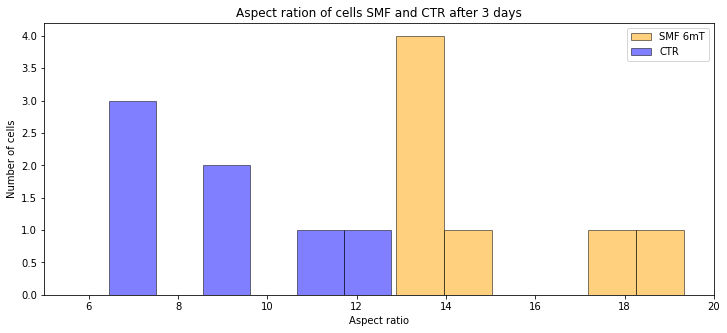

In [797]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))

plt.hist(SMF, bins = 6, color='Orange', edgecolor='black', alpha=0.5, label='SMF 6mT')
plt.hist(CTR, bins = 6, color='Blue', edgecolor='black', alpha=0.5, label='CTR')

plt.xlim(xmin=5, xmax = 20)
plt.xlabel('Aspect ratio')
plt.ylabel('Number of cells')
plt.legend(loc='upper right')
plt.title('Aspect ration of cells SMF and CTR after 3 days')
plt.savefig('AR2.png', bbox_inches='tight')
plt.show()